In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob
import plotly.express as px
import os
import seaborn as sns; sns.set_theme()
from posicionamento import posicionamento_partidos

In [49]:
all_files = glob.glob(os.path.join("dados/orientacoes/*.csv"))
all_files
li = []

for file in all_files:
    dfo = pd.read_csv(file, index_col=None, header=0, sep=";")
    li.append(dfo)

dfo = pd.concat(li, axis=0, ignore_index=True)
dfo = dfo.drop(["uriVotacao", "descricao", "uriBancada", "siglaOrgao"], axis=1)
print(dfo.columns)
dfo

Index(['idVotacao', 'siglaBancada', 'orientacao'], dtype='object')


,idVotacao,siglaBancada,orientacao
0,140406-31,PSB,Não
1,140406-31,PP,Não
2,140406-31,PV,Não
3,140406-31,PMDB,Não
4,140406-31,PSDB,Obstrução
...,...,...,...
76064,2312874-9,MDB,Sim
76065,2312874-9,Podemos,Liberado
76066,2312874-9,Patriota,NaN
76067,2312874-9,PCdoB,Não


In [50]:
all_files = glob.glob(os.path.join("dados/votos/*.csv"))
all_files
li = []

for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0, sep=";")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df

,idVotacao,uriVotacao,dataHoraVoto,voto,deputado_id,deputado_uri,deputado_nome,deputado_siglaPartido,deputado_uriPartido,deputado_siglaUf,deputado_idLegislatura,deputado_urlFoto
0,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11T19:49:15,Sim,73886,https://dadosabertos.camara.leg.br/api/v2/depu...,Adão Pretto,PT,https://dadosabertos.camara.leg.br/api/v2/part...,RS,51,http://www.camara.gov.br/internet/deputado/ban...
1,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11T19:29:35,Sim,74328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adauto Pereira,PFL,https://dadosabertos.camara.leg.br/api/v2/part...,PB,51,http://www.camara.gov.br/internet/deputado/ban...
2,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11T19:26:34,Sim,74450,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Marinho,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,CE,51,http://www.camara.gov.br/internet/deputado/ban...
3,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11T19:25:14,Artigo 17,74646,https://dadosabertos.camara.leg.br/api/v2/depu...,Aécio Neves,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,MG,51,http://www.camara.gov.br/internet/deputado/ban...
4,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11T19:26:59,Sim,73765,https://dadosabertos.camara.leg.br/api/v2/depu...,Affonso Camargo,PFL,https://dadosabertos.camara.leg.br/api/v2/part...,PR,51,http://www.camara.gov.br/internet/deputado/ban...
...,...,...,...,...,...,...,...,...,...,...,...,...
1329477,945554-186,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-04-07T13:21:12,Sim,178889,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Carlos,PT,https://dadosabertos.camara.leg.br/api/v2/part...,MA,56,http://www.camara.gov.br/internet/deputado/ban...
1329478,945554-186,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-04-07T13:22:05,Sim,204559,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Neto,PT,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,http://www.camara.gov.br/internet/deputado/ban...
1329479,945554-186,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-04-07T13:26:44,Não,160632,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Silva,SOLIDARIEDADE,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...
1329480,945554-186,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-04-07T13:21:07,Não,204517,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...


In [51]:
df["dataHoraVoto"] = pd.to_datetime(df['dataHoraVoto'])
df

,idVotacao,uriVotacao,dataHoraVoto,voto,deputado_id,deputado_uri,deputado_nome,deputado_siglaPartido,deputado_uriPartido,deputado_siglaUf,deputado_idLegislatura,deputado_urlFoto
0,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11 19:49:15,Sim,73886,https://dadosabertos.camara.leg.br/api/v2/depu...,Adão Pretto,PT,https://dadosabertos.camara.leg.br/api/v2/part...,RS,51,http://www.camara.gov.br/internet/deputado/ban...
1,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11 19:29:35,Sim,74328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adauto Pereira,PFL,https://dadosabertos.camara.leg.br/api/v2/part...,PB,51,http://www.camara.gov.br/internet/deputado/ban...
2,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11 19:26:34,Sim,74450,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Marinho,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,CE,51,http://www.camara.gov.br/internet/deputado/ban...
3,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11 19:25:14,Artigo 17,74646,https://dadosabertos.camara.leg.br/api/v2/depu...,Aécio Neves,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,MG,51,http://www.camara.gov.br/internet/deputado/ban...
4,37897-3,https://dadosabertos.camara.leg.br/api/v2/vota...,2001-12-11 19:26:59,Sim,73765,https://dadosabertos.camara.leg.br/api/v2/depu...,Affonso Camargo,PFL,https://dadosabertos.camara.leg.br/api/v2/part...,PR,51,http://www.camara.gov.br/internet/deputado/ban...
...,...,...,...,...,...,...,...,...,...,...,...,...
1329477,945554-186,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-04-07 13:21:12,Sim,178889,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Carlos,PT,https://dadosabertos.camara.leg.br/api/v2/part...,MA,56,http://www.camara.gov.br/internet/deputado/ban...
1329478,945554-186,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-04-07 13:22:05,Sim,204559,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Neto,PT,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,http://www.camara.gov.br/internet/deputado/ban...
1329479,945554-186,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-04-07 13:26:44,Não,160632,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Silva,SOLIDARIEDADE,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...
1329480,945554-186,https://dadosabertos.camara.leg.br/api/v2/vota...,2022-04-07 13:21:07,Não,204517,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...


In [52]:
df = df.drop(["uriVotacao", "deputado_uri", "deputado_uriPartido", "deputado_urlFoto", "deputado_idLegislatura"], axis=1)
df["voto"].replace({"Sim": 1, "Não": -1, "Abstenção": 0, 'Artigo 17':0, 'Obstrução':0, 
                    "Favorável com restrições":0, "Branco":0}, inplace=True)
df["voto_count"] = 1
df

,idVotacao,dataHoraVoto,voto,deputado_id,deputado_nome,deputado_siglaPartido,deputado_siglaUf,voto_count
0,37897-3,2001-12-11 19:49:15,1.0,73886,Adão Pretto,PT,RS,1
1,37897-3,2001-12-11 19:29:35,1.0,74328,Adauto Pereira,PFL,PB,1
2,37897-3,2001-12-11 19:26:34,1.0,74450,Adolfo Marinho,PSDB,CE,1
3,37897-3,2001-12-11 19:25:14,0.0,74646,Aécio Neves,PSDB,MG,1
4,37897-3,2001-12-11 19:26:59,1.0,73765,Affonso Camargo,PFL,PR,1
...,...,...,...,...,...,...,...,...
1329477,945554-186,2022-04-07 13:21:12,1.0,178889,Zé Carlos,PT,MA,1
1329478,945554-186,2022-04-07 13:22:05,1.0,204559,Zé Neto,PT,BA,1
1329479,945554-186,2022-04-07 13:26:44,-1.0,160632,Zé Silva,SOLIDARIEDADE,MG,1
1329480,945554-186,2022-04-07 13:21:07,-1.0,204517,Zé Vitor,PL,MG,1


In [53]:
dv = pd.merge(df, dfo, how='left', left_on=['idVotacao','deputado_siglaPartido'], right_on=['idVotacao','siglaBancada'])
dv = dv.drop(["siglaBancada"], axis=1)
dv_nan = dv[dv["voto"].isnull()].groupby("idVotacao").count()
dv = dv[~dv["idVotacao"].isin(dv_nan.index)]
dv["posicionamento"] = dv["deputado_siglaPartido"]
dv["posicionamento"].replace(posicionamento_partidos, inplace=True)
dv

,idVotacao,dataHoraVoto,voto,deputado_id,deputado_nome,deputado_siglaPartido,deputado_siglaUf,voto_count,orientacao,posicionamento
0,37897-3,2001-12-11 19:49:15,1.0,73886,Adão Pretto,PT,RS,1,NaN,Esquerda
1,37897-3,2001-12-11 19:29:35,1.0,74328,Adauto Pereira,PFL,PB,1,NaN,Centro-direita
2,37897-3,2001-12-11 19:26:34,1.0,74450,Adolfo Marinho,PSDB,CE,1,NaN,Centro
3,37897-3,2001-12-11 19:25:14,0.0,74646,Aécio Neves,PSDB,MG,1,NaN,Centro
4,37897-3,2001-12-11 19:26:59,1.0,73765,Affonso Camargo,PFL,PR,1,NaN,Centro-direita
...,...,...,...,...,...,...,...,...,...,...
1329477,945554-186,2022-04-07 13:21:12,1.0,178889,Zé Carlos,PT,MA,1,Sim,Esquerda
1329478,945554-186,2022-04-07 13:22:05,1.0,204559,Zé Neto,PT,BA,1,Sim,Esquerda
1329479,945554-186,2022-04-07 13:26:44,-1.0,160632,Zé Silva,SOLIDARIEDADE,MG,1,NaN,Centro
1329480,945554-186,2022-04-07 13:21:07,-1.0,204517,Zé Vitor,PL,MG,1,Não,Centro-direita


In [54]:
dv.columns = ['idVotacao', 'data', 'voto', 'id', 'nome',
       'partido', 'UF', 'voto_count', 'orientacao', 'posicionamento']

dv["ano"] = pd.DatetimeIndex(dv['data']).year

dv = dv.query("ano > 2002")

In [75]:
teste = dv.groupby(by=["idVotacao","posicionamento"], as_index=False).count()[["id", "posicionamento"]]
teste

,id,posicionamento
0,3151,Centro-direita
1,3155,Centro-direita
2,4927,Centro-direita
3,4928,Centro-direita
4,4928,Centro-esquerda
...,...,...
2453,218086,Centro-direita
2454,218245,Centro-direita
2455,218741,Centro
2456,218879,Centro


In [55]:
new_dv = dv.copy()
new_dv.dropna(subset = ["orientacao"], inplace=True)
new_dv["ano"] = pd.DatetimeIndex(new_dv['data']).year
new_dv["orientacao"].replace({"Sim": 1, "Não": -1, "Abstenção": 0, 'Liberado':0, 'Obstrução':0}, inplace=True)
new_dv.drop(["data"], axis=1, inplace=True)
new_dv

,idVotacao,voto,id,nome,partido,UF,voto_count,orientacao,posicionamento,ano
2810,113716-111,-1.0,73764,Abelardo Lupion,PFL,PR,1,-1,Centro-direita,2003
2811,113716-111,1.0,73886,Adão Pretto,PT,RS,1,1,Esquerda,2003
2812,113716-111,1.0,74328,Adauto Pereira,PFL,PB,1,-1,Centro-direita,2003
2813,113716-111,1.0,74386,Adelor Vieira,PMDB,SC,1,1,Centro,2003
2814,113716-111,1.0,73765,Affonso Camargo,PSDB,PR,1,1,Centro,2003
...,...,...,...,...,...,...,...,...,...,...
1329475,945554-186,-1.0,74043,Wellington Roberto,PL,PB,1,-1,Centro-direita,2022
1329477,945554-186,1.0,178889,Zé Carlos,PT,MA,1,1,Esquerda,2022
1329478,945554-186,1.0,204559,Zé Neto,PT,BA,1,1,Esquerda,2022
1329480,945554-186,-1.0,204517,Zé Vitor,PL,MG,1,-1,Centro-direita,2022


In [56]:
new_dv.query("voto != orientacao and orientacao != 0")

,idVotacao,voto,id,nome,partido,UF,voto_count,orientacao,posicionamento,ano
2812,113716-111,1.0,74328,Adauto Pereira,PFL,PB,1,-1,Centro-direita,2003
2816,113716-111,-1.0,73579,Alberto Fraga,PMDB,DF,1,1,Centro,2003
2819,113716-111,-1.0,73477,Alceu Collares,PDT,RS,1,1,Centro-esquerda,2003
2823,113716-111,-1.0,74057,Alice Portugal,PCdoB,BA,1,1,Esquerda,2003
2829,113716-111,-1.0,74036,Álvaro Dias,PDT,RN,1,1,Centro-esquerda,2003
...,...,...,...,...,...,...,...,...,...,...
1329300,945554-186,-1.0,178931,Luciano Ducci,PSB,PR,1,1,Centro-esquerda,2022
1329380,945554-186,-1.0,160517,Paulo Foletto,PSB,ES,1,1,Centro-esquerda,2022
1329437,945554-186,1.0,204438,Sergio Toledo,PL,AL,1,-1,Centro-direita,2022
1329441,945554-186,0.0,178946,Soraya Santos,PL,RJ,1,-1,Centro-direita,2022


In [57]:
votacoes_por_ano = dv.groupby(by=["ano", "idVotacao"], as_index=False).sum().drop(["voto", "id", "voto_count"], axis=1)
votacoes_por_ano = votacoes_por_ano.groupby(["ano"], as_index=False).count()
votacoes_por_ano = votacoes_por_ano.query("ano < 2022")
votacoes_por_ano

,ano,idVotacao
0,2003,61
1,2004,97
2,2005,67
3,2006,65
4,2007,164
5,2008,118
6,2009,170
7,2010,82
8,2011,125
9,2012,85


In [58]:
votos_por_ano = dv.groupby(by=["ano"], as_index=False).sum().drop(["voto", "id"], axis=1)
votos_por_ano = votos_por_ano.query("ano < 2022")
votos_por_ano

,ano,voto_count
0,2003,12380
1,2004,24903
2,2005,17455
3,2006,20704
4,2007,41102
5,2008,32110
6,2009,45908
7,2010,22293
8,2011,33237
9,2012,22345


In [59]:
fig = px.bar(votacoes_por_ano, x='ano', y='idVotacao')
fig.update_layout(plot_bgcolor="white")
fig.update_layout(title_x=0.5)
fig.update_layout(
    title_text="Total de votações ao longo dos anos",
    title_x=0.5,
    xaxis_title_text="<b>Ano</b>",
    yaxis_title_text="<b>Quantidade de votações</b>",
)
fig.update_traces(marker_color='#30ade3')
fig.update_layout(xaxis = {'type' : 'category'})
fig.show()

In [60]:
fig = px.bar(votos_por_ano, x='ano', y='voto_count')
fig.update_layout(plot_bgcolor="white")
fig.update_layout(
    title_text="Total de votos ao longo dos anos",
    title_x=0.5,
    xaxis_title_text="<b>Ano</b>",
    yaxis_title_text="<b>Quantidade de votos</b>",
)
fig.update_traces(marker_color='#30ade3')
fig.update_layout(xaxis = {'type' : 'category'})
fig.show()

In [14]:
df_heat = dv.copy()
df_heat["ano"] = pd.DatetimeIndex(dv['data']).year
df_heat.drop(["orientacao", "data", "voto_count", "UF", "nome", "id"], axis=1, inplace=True)
heat = df_heat.groupby(["partido", "ano"], as_index=False).sum()
#heat = heat.query("ano > 2015 and ano < 2019")
heat

,partido,ano,voto
0,AVANTE,2017,44.0
1,AVANTE,2018,20.0
2,AVANTE,2019,-1.0
3,AVANTE,2020,-31.0
4,AVANTE,2021,495.0
...,...,...,...
476,SOLIDARIEDADE,2019,-103.0
477,SOLIDARIEDADE,2020,-28.0
478,SOLIDARIEDADE,2021,853.0
479,SOLIDARIEDADE,2022,247.0


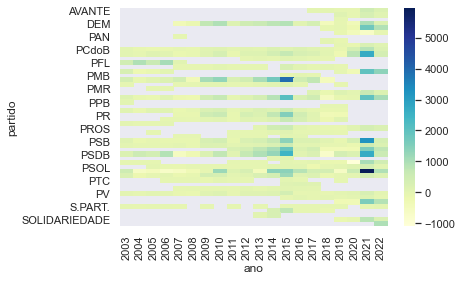

In [15]:
flights = sns.load_dataset("flights")
heat = heat.pivot("partido", "ano", "voto")
ax = sns.heatmap(heat, cmap="YlGnBu")

In [31]:
#heat = heat.pivot("partido", "ano", "voto")
fig = px.imshow(heat)
fig.update_layout(
    title_text="Heatmap - Tendência de votos por partido, por ano",
    title_x=0.5,
    xaxis_title_text="<b>Ano</b>",
    yaxis_title_text="<b>Partido</b>",
)
fig.show()

In [17]:
dv["orientacao"] = dv["orientacao"].fillna("Sem dados")
dv["orientacao"].unique()

<ipython-input-17-df9325b4af4c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Sem dados', 'Não', 'Sim', 'Obstrução', 'Liberado', 'Abstenção'],
      dtype=object)

In [18]:
votacoes = dv.groupby(by=["idVotacao"]).sum().drop(["id", "voto_count"], axis=1)
votacoes

,voto,ano
idVotacao,,
101666-71,333.0,705510
104342-141,180.0,812835
104342-99,-170.0,786744
104485-117,20.0,48168
104509-28,3.0,26039
...,...,...
996553-34,-101.0,892645
996553-39,23.0,854360
996553-43,88.0,755625


In [19]:
neo_df = dv.query("partido == 'PT'")
neo_df = neo_df.groupby(["idVotacao", "partido"]).sum()
neo_df = neo_df.drop(["id", "voto_count"], axis=1)
neo_df = neo_df.sort_values("voto")

In [20]:
merge_df = neo_df.merge(votacoes, left_on="idVotacao", right_on="idVotacao")
merge_df["voto_y"] = np.where(merge_df['voto_y'] > 0, 1, 0)
merge_df["voto_x"] = np.where(merge_df['voto_x'] > 0, 1, 0)
merge_df

,voto_x,ano_x,voto_y,ano_y
idVotacao,,,,
282740-60,0,176440,0,812025
562615-106,0,165066,0,851499
562615-93,0,165066,0,843447
277133-92,0,164410,0,611525
282740-97,0,162405,0,699745
...,...,...,...,...
513496-260,1,166913,1,794345
113717-184,1,174261,1,859287
590335-46,1,169176,1,944566


In [21]:
merge_df.groupby(["voto_x", "voto_y"]).size()

voto_x  voto_y
0       0         1021
        1          914
1       0          705
        1         1280
dtype: int64

In [22]:
new_df = dv.groupby(["partido"]).sum()
new_df = new_df.drop(["id", "voto_count"], axis=1)
new_df = new_df.reset_index(level=0)
new_df = new_df.sort_values("voto")
new_df

,partido,voto,ano
5,NOVO,-1165.0,26030033
7,PATRI,-25.0,1180889
22,PPL,-13.0,203851
2,DC,-6.0,40380
18,PMR,2.0,162460
6,PAN,5.0,369288
15,PMB,12.0,1296314
39,PTC,45.0,2100215
45,S.PART.,48.0,2505177
21,PPB,67.0,284426


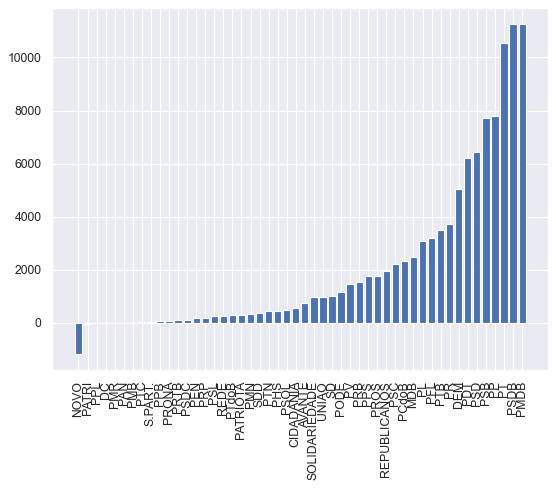

In [23]:
figure(figsize=(8, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(new_df["partido"], new_df["voto"])
plt.show()